# Загрузка и подготовка данных

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [81]:
df = pd.read_csv('../data/classification/alizadeh_preprocessed.csv') 

In [82]:
df.head(10)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,39,52,261,50,0,2,1,0,1,0
1,67,70,157,2,28.398718,0,1,0,0,0,...,38,55,165,40,4,2,1,1,0,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,38,60,230,40,2,0,1,0,0,0
3,66,67,158,2,26.838648,0,1,0,0,0,...,18,72,742,55,0,3,0,0,0,1
4,50,87,153,2,37.165193,0,1,0,0,0,...,55,39,274,50,0,3,0,0,0,1
5,50,75,175,1,24.489796,0,0,1,0,0,...,26,66,194,50,0,2,1,1,1,0
6,55,80,165,1,29.384757,0,0,0,1,0,...,58,33,292,40,4,0,1,0,0,0
7,72,80,175,1,26.122449,1,0,1,0,0,...,25,74,410,45,4,0,1,1,1,0
8,58,84,163,2,31.615793,0,0,0,0,0,...,49,50,370,50,0,2,0,0,0,1
9,60,71,170,1,24.567474,1,0,0,0,0,...,55,42,380,40,2,2,0,1,1,0


In [83]:
X = df.iloc[:,:26].values
y = df.iloc[:,27].values

In [84]:
print (df.shape, X.shape, y.shape)

(303, 59) (303, 26) (303,)


In [85]:
print(X)

[[ 53.  90. 175. ...   0.   0.   0.]
 [ 67.  70. 157. ...   0.   1.   0.]
 [ 54.  54. 164. ...   0.   1.   0.]
 ...
 [ 48.  77. 160. ...   0.   0.   0.]
 [ 57.  90. 159. ...   0.   0.   1.]
 [ 56.  85. 170. ...   0.   1.   0.]]


In [86]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0
 1 1 0 1 0 1 0]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [88]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
X_train

array([[-0.60254067,  1.36614368,  1.08743731, ..., -0.21055872,
        -1.15311332, -0.91841073],
       [ 0.69429814, -0.29453556, -0.80048843, ..., -0.21055872,
         0.86721746, -0.91841073],
       [-0.50990933, -1.62307896, -0.06629509, ..., -0.21055872,
         0.86721746, -0.91841073],
       ...,
       [ 0.04587873, -1.37397708,  0.98255255, ..., -0.21055872,
         0.86721746, -0.91841073],
       [-1.25096008,  0.03760028,  1.29720684, ..., -0.21055872,
        -1.15311332, -0.91841073],
       [ 0.87956083, -1.12487519,  0.03858968, ..., -0.21055872,
        -1.15311332,  1.08883746]])

# Метод k-ближайших соседей (K-Nearest Neighbors)

In [91]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [92]:
y_pred = KNN.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[48  9]
 [12 22]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        57
           1       0.71      0.65      0.68        34

    accuracy                           0.77        91
   macro avg       0.75      0.74      0.75        91
weighted avg       0.77      0.77      0.77        91

0.7692307692307693


# Классификатор дерева решений (Decision Tree Classifier)

In [93]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

In [96]:
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[51  6]
 [11 23]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        57
           1       0.79      0.68      0.73        34

    accuracy                           0.81        91
   macro avg       0.81      0.79      0.79        91
weighted avg       0.81      0.81      0.81        91

0.8131868131868132


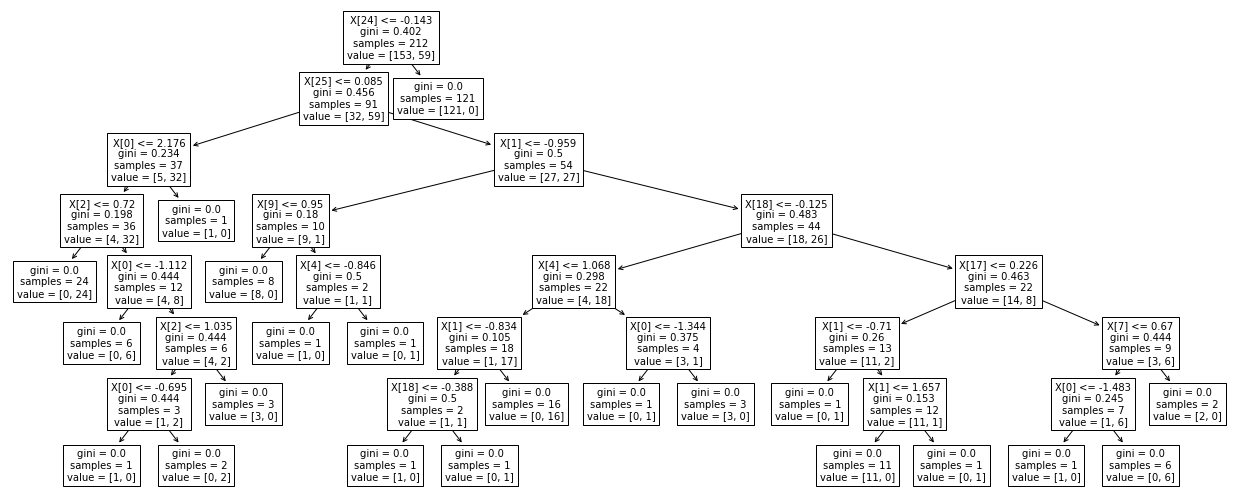

In [97]:
plt.figure(figsize=(22,9))
tree.plot_tree(dtc, fontsize=10)
plt.show()

# Наивный байесовский классификатор (Naive Bayes)

In [98]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [99]:
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[43 14]
 [ 0 34]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        57
           1       0.71      1.00      0.83        34

    accuracy                           0.85        91
   macro avg       0.85      0.88      0.84        91
weighted avg       0.89      0.85      0.85        91

0.8461538461538461


# Метод опорных векторов (Support Vector Machines)

In [100]:
msvm = svm.SVC()
msvm.fit(X_train, y_train)

SVC()

In [102]:
y_pred = msvm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[45 12]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        57
           1       0.72      0.91      0.81        34

    accuracy                           0.84        91
   macro avg       0.83      0.85      0.83        91
weighted avg       0.86      0.84      0.84        91

0.8351648351648352


# Логистическая регрессия (Logistic Regression)

In [103]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_pred = lr.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:",)
print (classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

Confusion Matrix:
[[44 13]
 [ 6 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        57
           1       0.68      0.82      0.75        34

    accuracy                           0.79        91
   macro avg       0.78      0.80      0.78        91
weighted avg       0.81      0.79      0.79        91

Accuracy: 0.7912087912087912


# Разделение выборки

In [105]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([153, 59])
dict_values([34, 57])


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([147, 65])
dict_values([63, 28])


In [108]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[54  9]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        63
           1       0.76      1.00      0.86        28

    accuracy                           0.90        91
   macro avg       0.88      0.93      0.89        91
weighted avg       0.93      0.90      0.90        91

0.9010989010989011


# Кросс-валидация


In [109]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

In [110]:
skf = StratifiedKFold(n_splits=7)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 38  39  40  42  44  45  46  47  48  51  52  53  54  55  56  57  59  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288

In [111]:
skf = StratifiedKFold(n_splits=7)
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = KNeighborsClassifier(n_neighbors=7)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        30
           1       0.25      0.14      0.18        14

    accuracy                           0.59        44
   macro avg       0.46      0.47      0.45        44
weighted avg       0.53      0.59      0.55        44

0.5909090909090909
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        30
           1       0.14      0.07      0.10        14

    accuracy                           0.57        44
   macro avg       0.40      0.44      0.41        44
weighted avg       0.49      0.57      0.52        44

0.5681818181818182
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        30
           1       0.17      0.08      0.11        13

    accuracy                           0.60        43
   macro avg       0.42      0.46      0.43        43
weighted avg       0.52      0.60   

# Подбор гиперпараметров


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [114]:
parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
print (clf.cv_results_)
print(clf.best_params_)

{'mean_fit_time': array([0.00099607, 0.0001956 , 0.00020461, 0.00039592, 0.00059972,
       0.00059834, 0.0001925 , 0.00059919, 0.00019965, 0.00040131]), 'std_fit_time': array([1.50336101e-06, 3.91197205e-04, 4.09221649e-04, 4.84921672e-04,
       4.89672053e-04, 4.88538753e-04, 3.84998322e-04, 4.89760125e-04,
       3.99303436e-04, 4.91506002e-04]), 'mean_score_time': array([0.00259819, 0.00219493, 0.00239205, 0.00219402, 0.00199304,
       0.00239372, 0.00199847, 0.00239649, 0.00199299, 0.00258856]), 'std_score_time': array([7.95583938e-04, 3.96077299e-04, 4.96821873e-04, 3.99567420e-04,
       2.91066026e-06, 4.88714100e-04, 2.00075099e-05, 4.81213930e-04,
       1.27212790e-05, 4.89285612e-04]), 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neigh

In [115]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[26  4]
 [10  3]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.43      0.23      0.30        13

    accuracy                           0.67        43
   macro avg       0.58      0.55      0.54        43
weighted avg       0.63      0.67      0.64        43

0.6744186046511628
